In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import utils
import seaborn as sns

In [8]:
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### First principles method

In [3]:
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Peak to Peak range by column in Raw        X:[1.45002000e+01 5.10000000e+01 1.41062937e+02 3.37333333e+01
 3.56790000e+04 1.24264103e+03 9.41000000e+00 1.00400000e+01]
Peak to Peak range by column in Normalized X:[  7.63258528   4.05236201  57.01555488  71.18248097  31.50645277
 119.64810316   4.40563562   5.0112724 ]


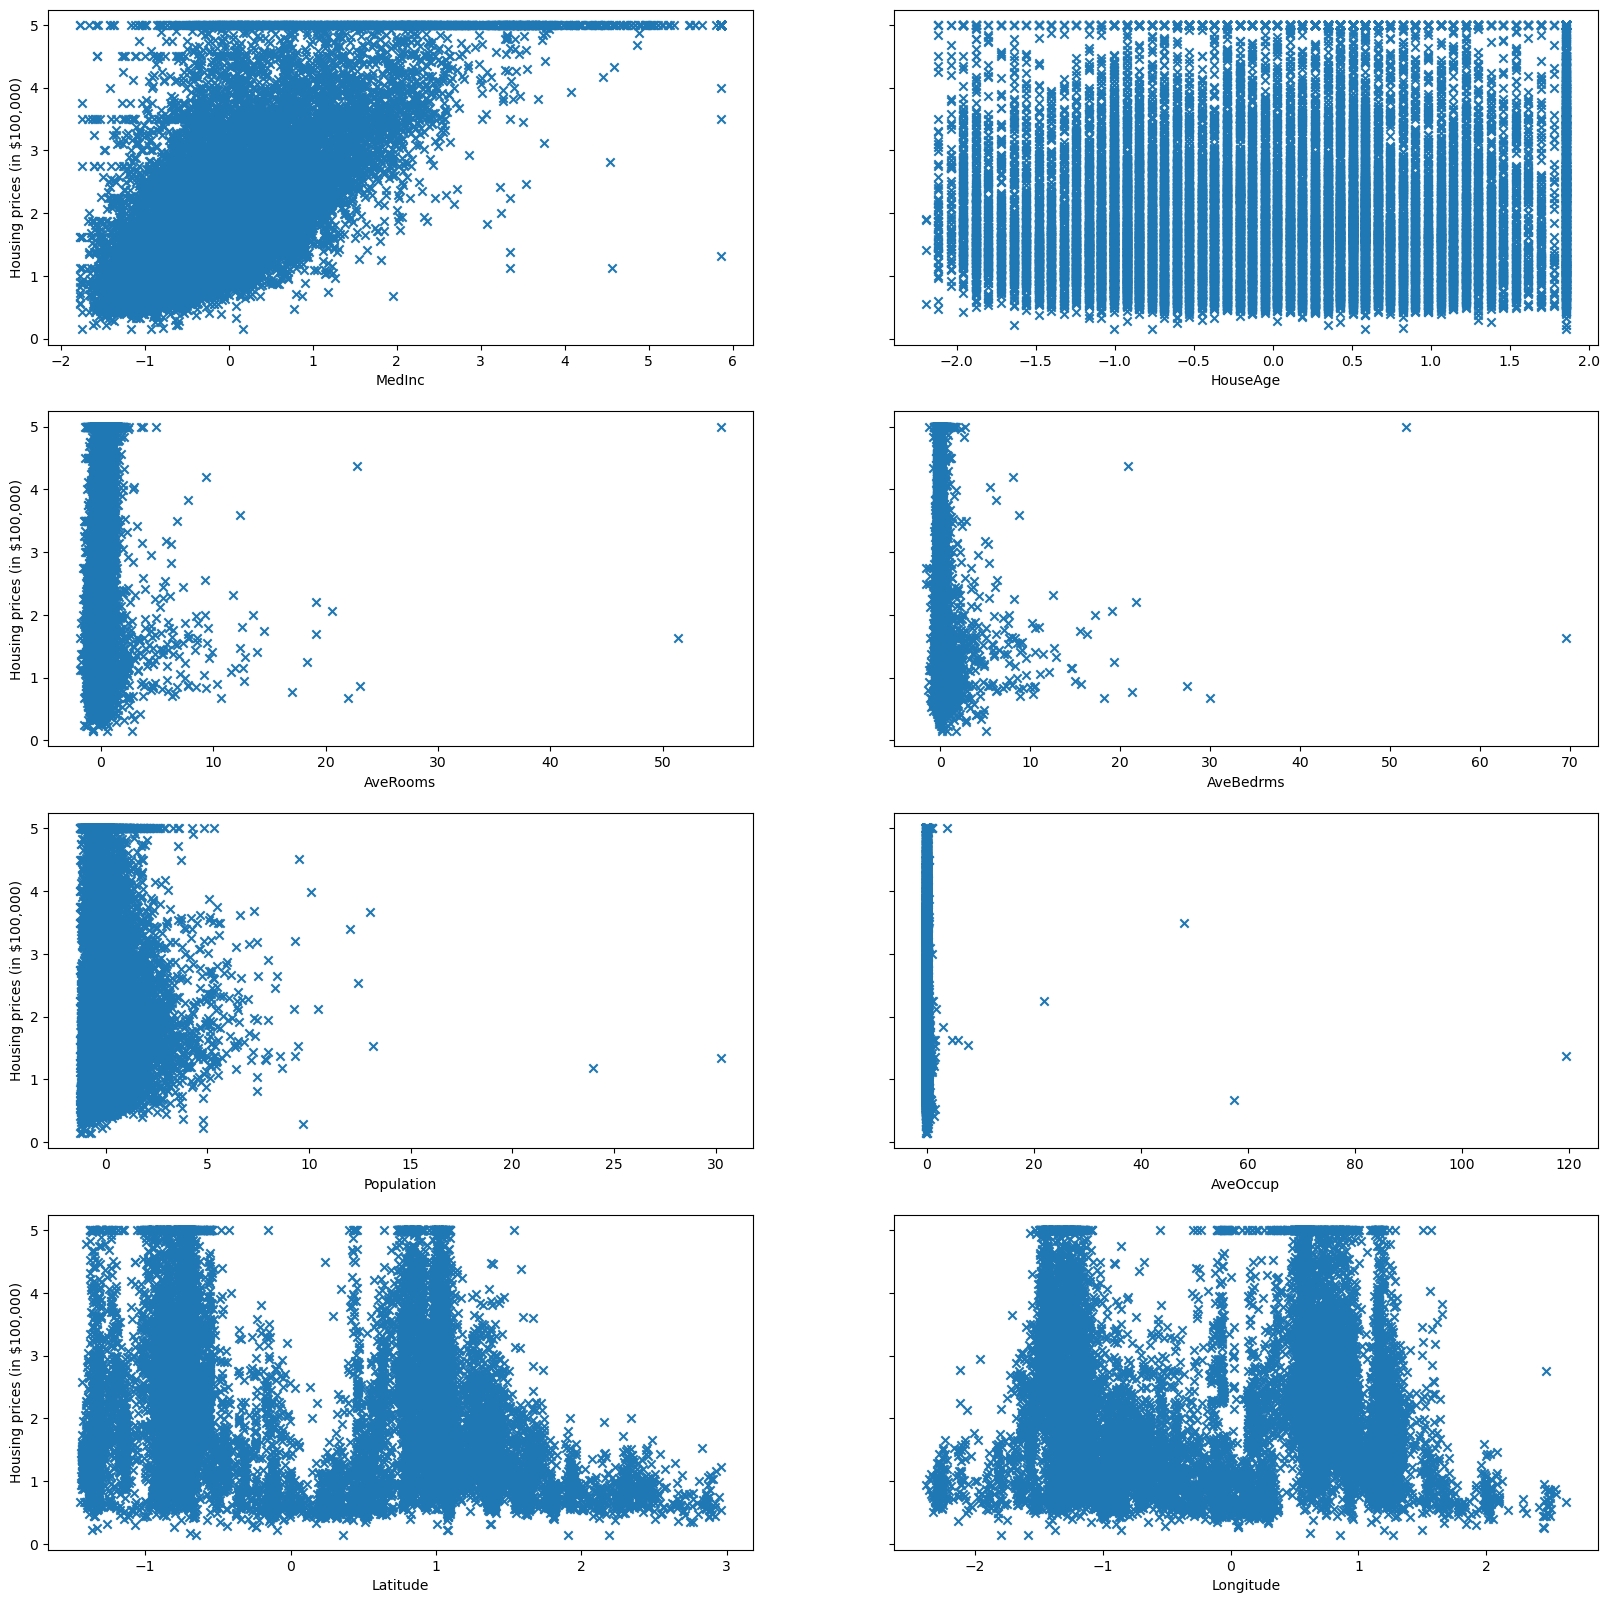

In [4]:
X = housing.data
y = housing.target

(m,n) = housing.data.shape

# appling feature scaling to data
X_norm = np.zeros((m,n))
for col in range(n):
    mu = np.mean(X[:, col])
    sigma = np.std(X[:,col])
    max_val = np.max(X[:, col])
    min_val = np.min(X[:, col])
    X_norm[:,col] = (X[:, col] - mu)/sigma

# scatter subplots to visualize each feature against the target variable
fig, axs = plt.subplots(4, 2, sharey=True, figsize=(20,20))
axs[0,0].set_ylabel("Housing prices (in $100,000)")
axs[0,0].scatter(X_norm[:,0], y, marker='x', c='C0')
axs[0,0].set_xlabel(f'{housing.feature_names[0]}')


axs[0,1].scatter(X_norm[:,1], y, marker='x', c='C0')
axs[0,1].set_xlabel(f'{housing.feature_names[1]}')

axs[1,0].set_ylabel("Housing prices (in $100,000)")
axs[1,0].scatter(X_norm[:,2], y, marker='x', c='C0')
axs[1,0].set_xlabel(f'{housing.feature_names[2]}')

axs[1,1].scatter(X_norm[:,3], y, marker='x', c='C0')
axs[1,1].set_xlabel(f'{housing.feature_names[3]}')

axs[2,0].set_ylabel("Housing prices (in $100,000)")
axs[2,0].scatter(X_norm[:,4], y, marker='x', c='C0')
axs[2,0].set_xlabel(f'{housing.feature_names[4]}')

axs[2,1].scatter(X_norm[:,5], y, marker='x', c='C0')
axs[2,1].set_xlabel(f'{housing.feature_names[5]}')

axs[3,0].set_ylabel("Housing prices (in $100,000)")
axs[3,0].scatter(X_norm[:,6], y, marker='x', c='C0')
axs[3,0].set_xlabel(f'{housing.feature_names[6]}')

axs[3,1].scatter(X_norm[:,7], y, marker='x', c='C0')
axs[3,1].set_xlabel(f'{housing.feature_names[7]}')


print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

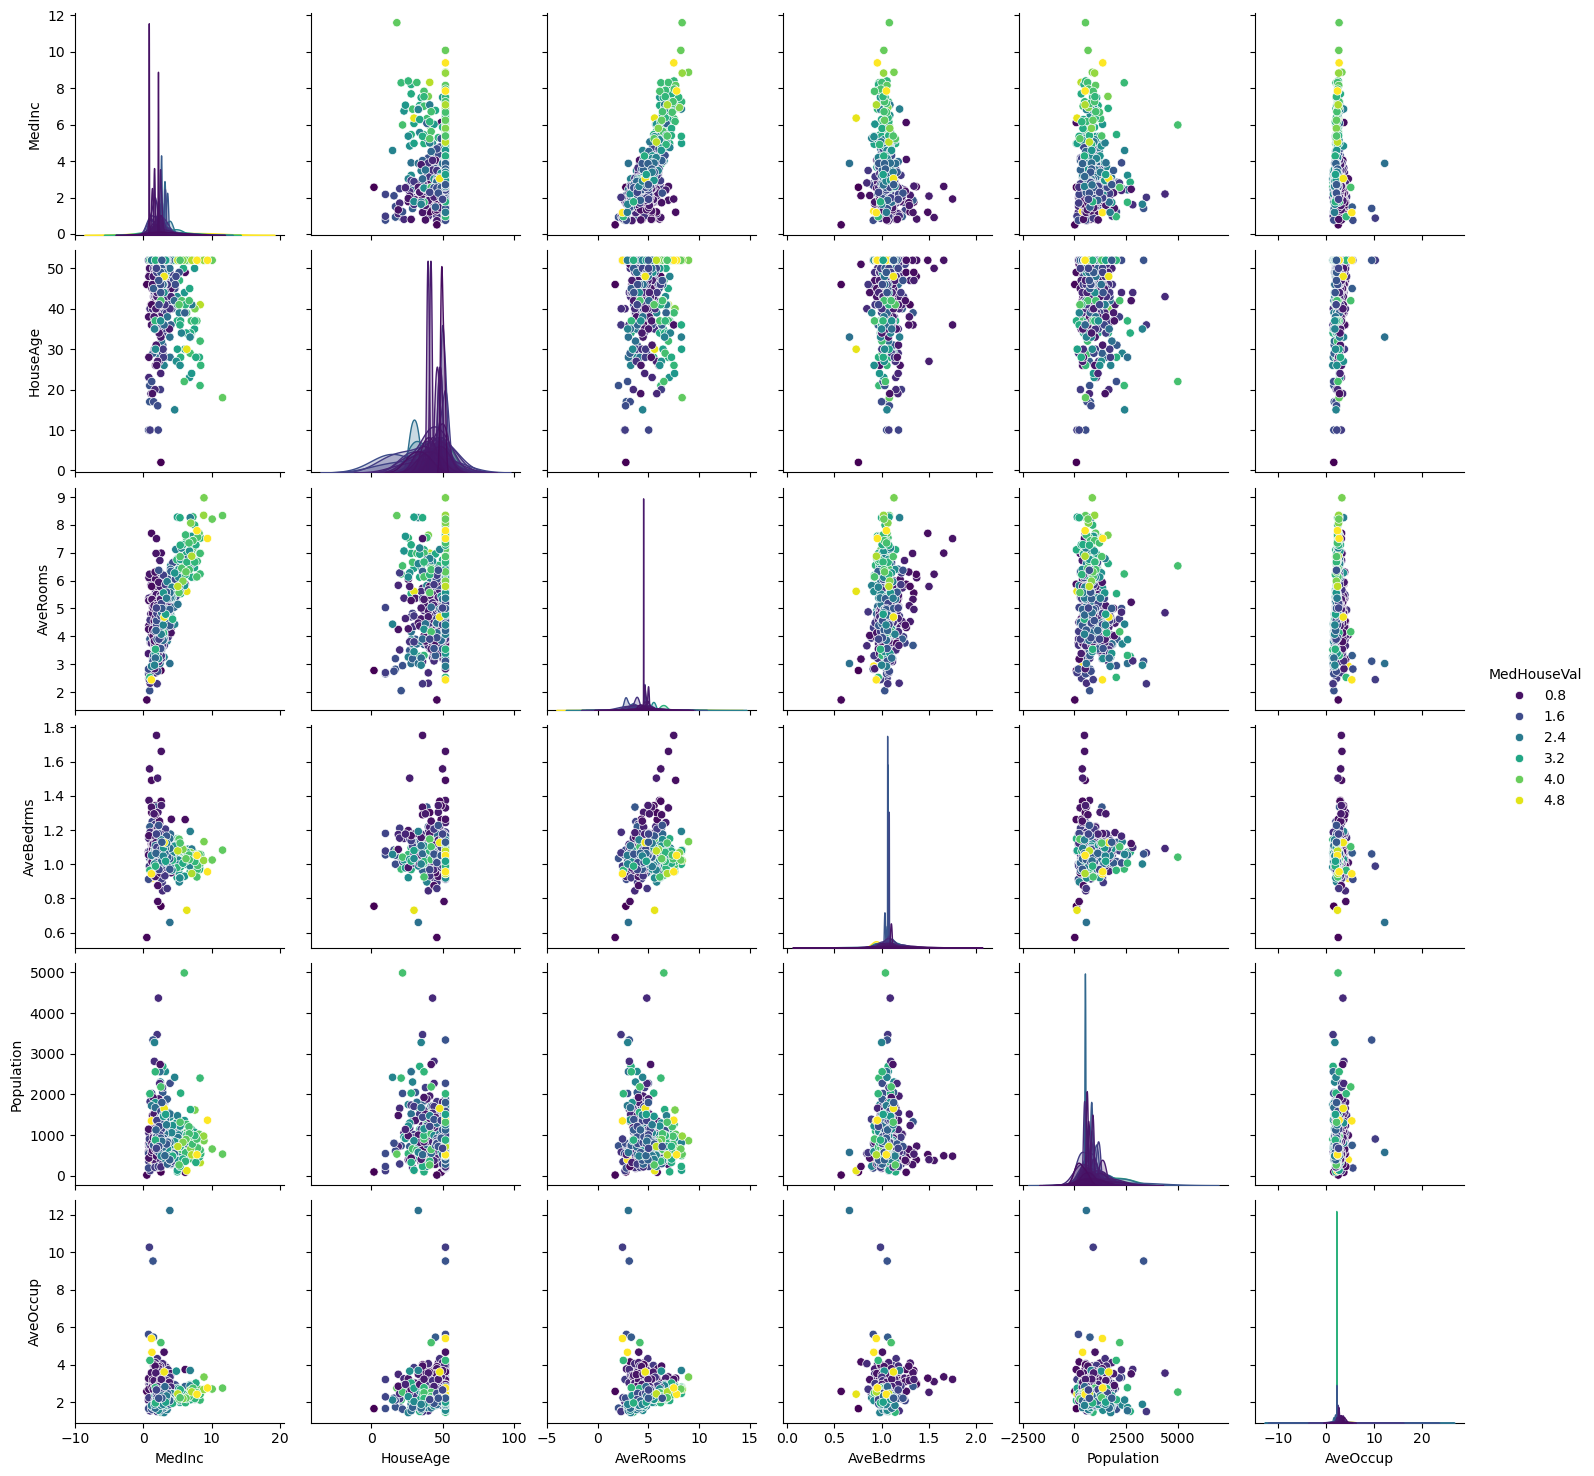

In [20]:
# The above can be simplified by using seaborn package's pairplot method
# _ = sns.pairplot()
n_samples_to_plot = 5000
to_drop = ['Latitude', 'Longitude']
subset = housing.frame.drop(columns=to_drop)
_ = sns.pairplot(
    data=subset[:500],
    hue="MedHouseVal",
    palette="viridis"
)


In [6]:
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [7]:
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of X_test: {X_test.shape}")

Dimensions of X_train: (13828, 8)
Dimensions of X_test: (6812, 8)


In [11]:
w_final, b_final, J_history = utils.gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), 0, utils.compute_cost, utils.compute_gradient, 0.001, 12000)

Iteration    0: Cost     2.80   
Iteration 1200: Cost     0.54   
Iteration 2400: Cost     0.33   
Iteration 3600: Cost     0.30   
Iteration 4800: Cost     0.29   
Iteration 6000: Cost     0.29   
Iteration 7200: Cost     0.28   
Iteration 8400: Cost     0.28   
Iteration 9600: Cost     0.28   
Iteration 10800: Cost     0.27   


In [12]:
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
# for i in range(m):
#     print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: 2.07,[ 0.82515845  0.16956174 -0.16180263  0.19573128  0.01697315 -0.03762941
 -0.53697247 -0.50477707] 


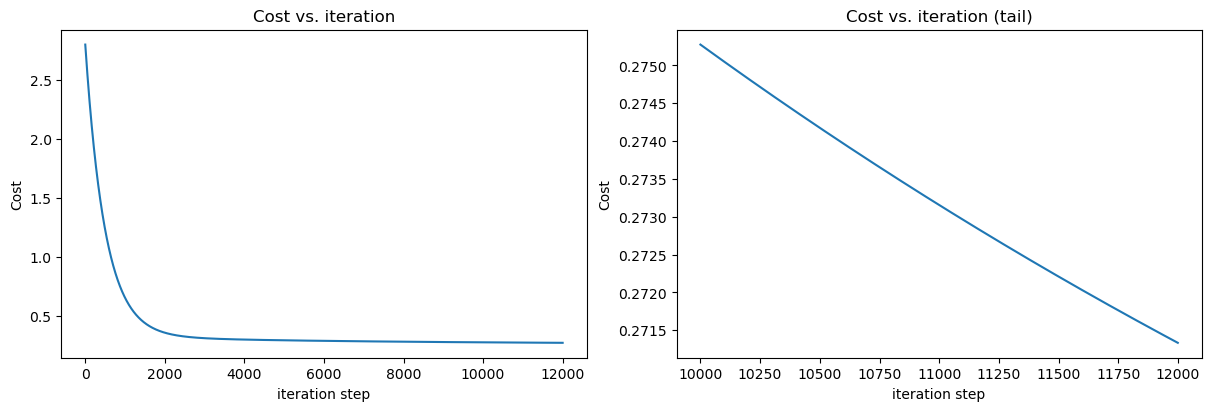

In [19]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(10000 + np.arange(len(J_history[10000:])), J_history[10000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

Cost decreases most rapidly in the first 2000 iterations. The last 2000 iterations decrease the cost by very very small amounts. 

In [22]:
y_train_pred = np.zeros(y_train.shape)
for i in range(y_train.shape[0]):
    y_train_pred[i] = np.dot(X_train[i], w_final) + b_final


root_mean_squared_error(y_train, y_train_pred)

np.float64(0.7366596531299875)

In [23]:
print(y_train[10:25], y_train_pred[10:25])

[1.56    3.397   0.847   2.685   1.76    1.849   1.474   0.93    3.76
 3.667   5.00001 1.176   0.876   2.045   1.544  ] [1.68859973 2.33854394 0.92727272 1.69946603 2.12572295 1.67906978
 2.18298772 0.42085312 3.11094528 2.56363138 2.33332308 1.61630622
 1.26279155 2.23824711 2.39699008]


Predictions aren't great. Probably feature engineering would help? 